Contents of /content/ after unzipping:
['.config', '.ipynb_checkpoints', 'testing_set', 'training_set', 'iuss-23-24-training-set.zip', 'iuss-23-24-testing-set.zip', 'sample_data']
Found 890 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 873ms/step - accuracy: 0.6513 - loss: 0.8141 - val_accuracy: 0.7252 - val_loss: 0.6041
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 811ms/step - accuracy: 0.7389 - loss: 0.5560 - val_accuracy: 0.7297 - val_loss: 0.5387
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 829ms/step - accuracy: 0.7868 - loss: 0.4623 - val_accuracy: 0.7748 - val_loss: 0.5574
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 857ms/step - accuracy: 0.8452 - loss: 0.3205 - val_accuracy: 0.8018 - val_loss: 0.6278
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 860ms/step - accuracy: 0.8851 - loss: 0.2465 - val_accuracy: 0.8063 - val_loss: 0.5590
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 863ms/step - accuracy: 0.9124 - loss: 0.2102 - val_accuracy: 0.7973 - val_loss: 0.8018
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 897ms/step - accuracy: 0.9523 - loss: 0.1299 - val_accuracy: 0.7928 - val_loss: 0.7536
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 934ms/step - accuracy: 0.9776 - loss: 0.0920 - val_accu

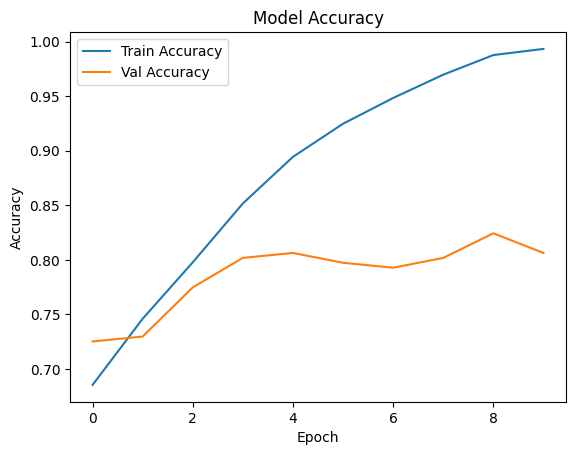

In [11]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import zipfile

# Define paths
train_zip_path = '/content/iuss-23-24-training-set.zip'
test_zip_path = '/content/iuss-23-24-testing-set.zip'

# Unzip the datasets
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List contents of /content/ to check extracted directory names
print("Contents of /content/ after unzipping:")
print(os.listdir('/content/'))

# Define directory paths based on the extracted structure
# **NOTE:** You might need to adjust these paths based on the output of os.listdir('/content/')
train_dir = '/content/training_set'
test_dir = '/content/testing_set'


# Load and preprocess training data
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# Evaluate performance
val_data.reset()
y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)

print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['benign', 'malignant']))

# Predict on test set (Unlabeled images)
test_images = os.listdir(test_dir)

for img_name in test_images[:5]:  # Preview first 5 predictions
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'malignant' if prediction > 0.5 else 'benign'
    print(f"{img_name}: {label} ({prediction:.2f})")

# Optional: Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()